<center><h1><font color="black"> Weather Image Classification with CNN models</font></h1></center>


<b>About Dataset</b></br>
The weather classification dataset comprises images categorized into four classes: sunrise (357 images), cloudy (300 images), shine (253 images), and rain (215 images). Each class represents a distinct weather condition, providing visual data for training and evaluating weather classification models. This dataset facilitates the development of machine learning algorithms capable of accurately categorizing images into one of these four weather classes, enabling applications in various sector.


<b>Project Statment:</br>
Weather Image Classification using Convolutional Neural Networks </br></b>

Design and implement a CNN-based system for classifying weather conditions from images. Given a dataset of weather images captured under different weather conditions, the system should accurately classify each image into one of several predefined weather classes.

 <b>Objectives</b></br>
<ol>
    <li>Load data and data exploration</li>
    <li>Data processing</li>
    <li>CCN's models for the classification of climatic images</li>
</ol>

In [ ]:
# Get access of your google drive
from google.colab import drive
drive.mount('./gdrive')

Mounted at ./gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Imarticus_Stats

/content/gdrive/MyDrive/Imarticus_Stats


<b>Import needed library

In [ ]:
# import system libs
import os
import itertools
from PIL import Image # pillow

# import data handling tools
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,BatchNormalization

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Check that all libraries have been loaded
print ('modules loaded')

modules loaded


# Data preprocessing

### <b>Load data & store it in data frame</b>

In [ ]:
!unzip 'archive (8).zip'

Archive:  archive (8).zip
  inflating: Multi-class Weather Dataset/Cloudy/cloudy1.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy10.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy100.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy101.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy102.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy103.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy104.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy105.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy106.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy107.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy108.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy109.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy11.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy110.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy111.jpg  
  inflating: Multi

In [ ]:
data_dir = "/content/gdrive/MyDrive/Imarticus_Stats/Multi-class Weather Dataset"

filepaths = []
labels = []
folds = os.listdir(data_dir) #It prints: ['Cloudy', 'Sunrise', 'Rain', 'Shine']

for fold in folds:
    fold_path= os.path.join(data_dir , fold)
    filelists = os.listdir(fold_path)

    for file in filelists:
        file_path= os.path.join(fold_path , file)

        filepaths.append(file_path)
        labels.append(fold)

#Make & concatenate series & store it in dataframe
Fseries = pd.Series(filepaths, name= "Filepaths")
Lseries = pd.Series(labels, name='Labels')

df = pd.concat([Fseries , Lseries], axis=1)
df.head()

Filepaths  Labels
0  /content/gdrive/MyDrive/Imarticus_Stats/Multi-...  Cloudy
1  /content/gdrive/MyDrive/Imarticus_Stats/Multi-...  Cloudy
2  /content/gdrive/MyDrive/Imarticus_Stats/Multi-...  Cloudy
3  /content/gdrive/MyDrive/Imarticus_Stats/Multi-...  Cloudy
4  /content/gdrive/MyDrive/Imarticus_Stats/Multi-...  Cloudy

### Data Exploration

In [ ]:
## load the dataset getting the full path
Dataset = '/content/gdrive/MyDrive/Imarticus_Stats/Multi-class Weather Dataset'

In [ ]:
def weather_path(base_path, weather_type):
    '''
    Function to construct the full path of files for a specific weather type.

    Parameters:
        - base_path (str): The base directory path where weather data is stored.
        - weather_type (str): The type of weather ('Cloudy', 'Rain', 'Shine', 'Sunrise').

    Returns:
        - str: The full path to the directory corresponding to the given weather type.
    '''
    # Concatenate the base path with the weather type to form the full path
    full_path = f"{base_path}/{weather_type}"
    return full_path

In [ ]:
# Define access routes for different types of weather data files
Cloudy = weather_path(Dataset, 'Cloudy')
Rain = weather_path(Dataset, 'Rain')
Shine = weather_path(Dataset, 'Shine')
Sunrise = weather_path(Dataset, 'Sunrise')

In [ ]:
counts=df["Labels"].value_counts()
counts

Labels
Sunrise    357
Cloudy     300
Shine      253
Rain       215
Name: count, dtype: int64

### Visualize data

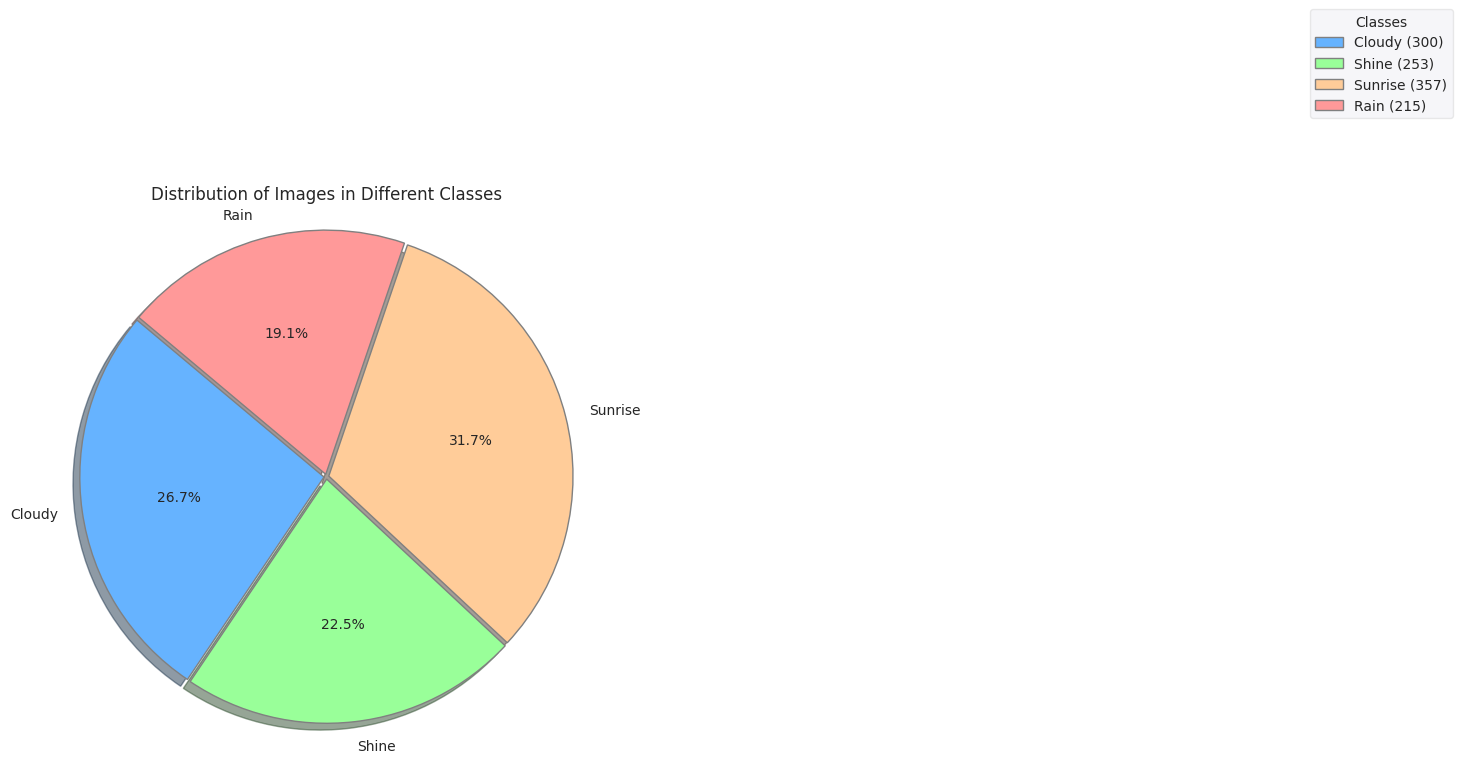

In [ ]:
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']
explode = (0.01, 0.01, 0.01, 0.01)

plt.figure(figsize=(7, 7))  # Adjust the figure size if needed
wedges, texts, autotexts = plt.pie(image_counts, labels=class_labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True, wedgeprops={'edgecolor': 'gray'})
plt.axis('equal')
plt.title('Distribution of Images in Different Classes')

# Calculate the position of the legend
x_offset = 1.4
y_offset = 0.5
x_position = plt.gca().get_position().x1 + x_offset
y_position = plt.gca().get_position().y1 + y_offset

# Create legend labels
legend_labels = [f"{label} ({count})" for label, count in zip(class_labels, image_counts)]

# Plot the legend outside the pie chart
plt.legend(title="Classes", labels=legend_labels, loc='upper left', bbox_to_anchor=(x_position, y_position), framealpha=0.4)

plt.show()


<b> Inference</b>: There is a higher number of samples of the sunrise class and a lower number of samples of the rain class.

### Images Reshaping

In [ ]:
def view_picture(File, weather_type):
    '''
    Function to view a sample of images in a directory with corresponding weather type titles.

    Parameters:
        - File (str): The directory path containing the images.
        - weather_type (str): The type of weather for the images.

    Returns:
        - None
    '''
    # Create a figure with a 3x3 grid of subplots
    plt.figure(figsize=(8, 8))

    # Loop through the first 9 images in the directory
    for i in range(9):
        plt.subplot(3, 3, i + 1)  # Select the next subplot
        image = plt.imread(os.path.join(File, os.listdir(File)[i]))  # Read the image
        plt.imshow(image)  # Display the image
        plt.title(weather_type)  # Set the title to the weather type

    plt.show()  # Show the plot

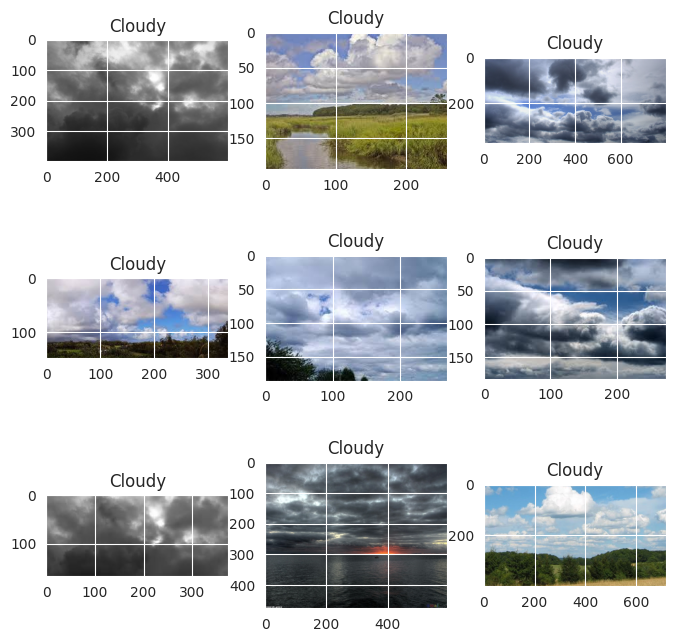

In [ ]:
view_picture(Cloudy, "Cloudy")

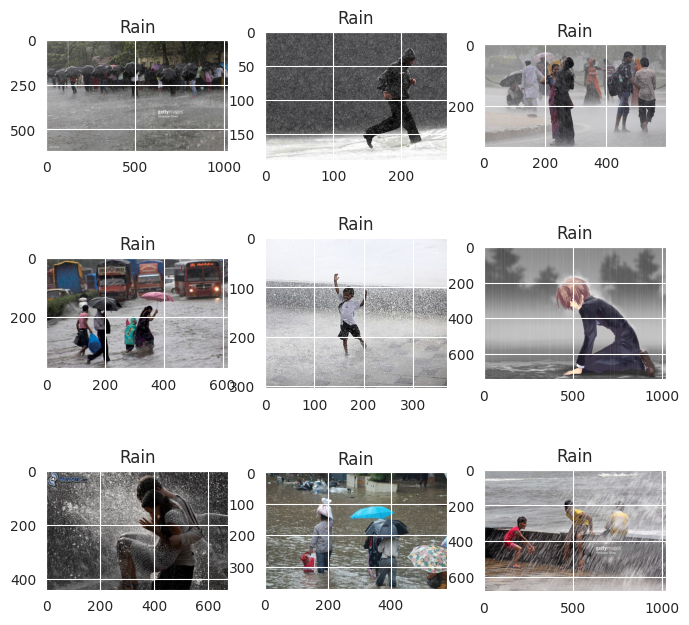

In [ ]:
view_picture(Rain, "Rain")

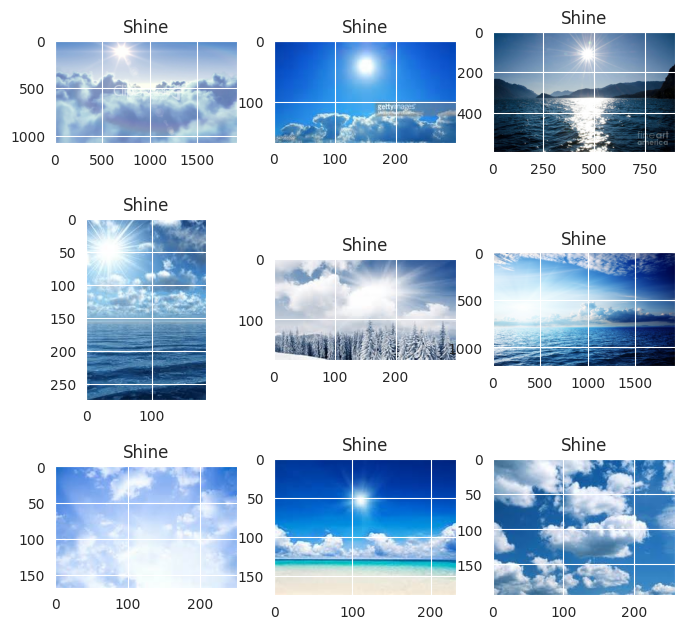

In [ ]:
view_picture(Shine, "Shine")

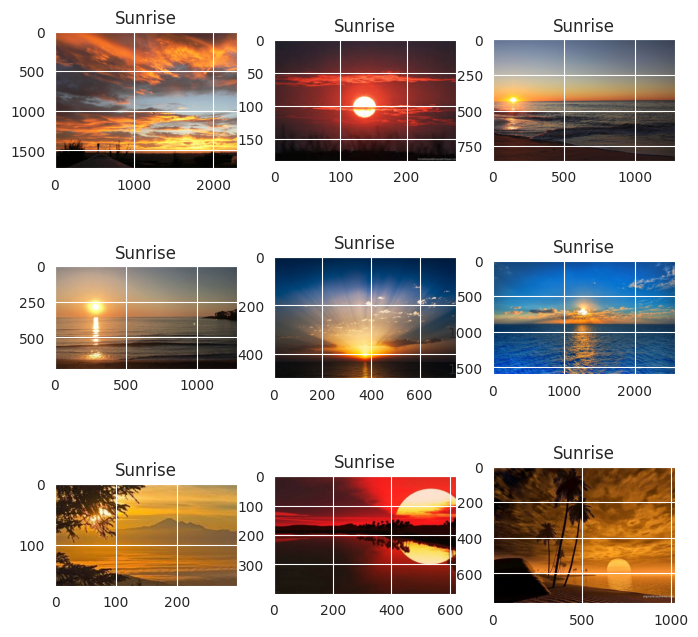

In [ ]:
view_picture(Sunrise, "Sunrise")

<b> Inference</b>: The size of the images must be adjusted

In [ ]:
def create_data_generators(dataset_path, target_size=(250, 250), batch_size=32, validation_split=0.2):
    '''
    Function to create data generators for training and validation.

    Parameters:
        - dataset_path (str): The directory path containing the dataset.
        - target_size (tuple): The dimensions to which all images will be resized.
        - batch_size (int): The batch size for training and validation.
        - validation_split (float): The fraction of the data to use for validation.

    Returns:
        - tuple: A tuple containing the training and validation data generators.
    '''
    # Define the image data generator with specified augmentation parameters
    data_generator = ImageDataGenerator(rescale=1. / 255,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        validation_split=validation_split)

    # Create the training data generator
    train_generator = data_generator.flow_from_directory(
        dataset_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    # Create the validation data generator
    validation_generator = data_generator.flow_from_directory(
        dataset_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )

    return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = create_data_generators(Dataset, target_size=(250, 250), batch_size=32, validation_split=0.2)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [ ]:
def plot_images(images, labels):
    '''
    Function to plot images with corresponding labels.

    Parameters:
        - images (numpy.ndarray): An array of images.
        - labels (numpy.ndarray): An array of labels corresponding to the images.

    Returns:
        - None
    '''
    # Create a figure with a 3x3 grid of subplots
    fig, axes = plt.subplots(3, 3, figsize=(5, 5))

    # Loop through the images and labels to plot them
    for i, ax in enumerate(axes.flat):
        # Display the image
        ax.imshow(images[i])
        ax.axis('off')  # Hide axes
        # Set the title for the subplot with the corresponding label
        ax.set_title(str(labels[i]))  # Convert label to string

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

In [ ]:
images, labels = next(train_generator)

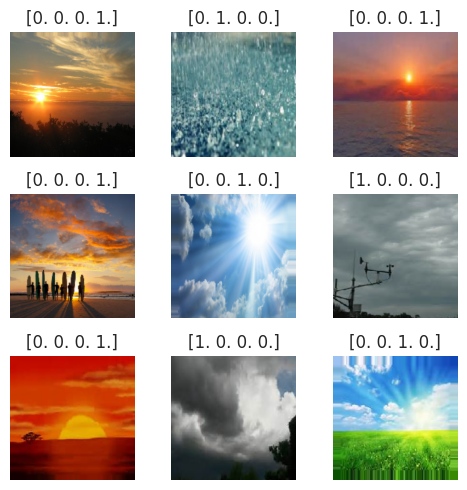

In [ ]:
plot_images(images, labels)

<b> Inference</b>: The size of the images has been standardized and the same number of samples is used for each of the classes.

### Split data into train ,valid and test</b>

In [ ]:
batch_size= 16
image_size= (224,224)

gen= ImageDataGenerator()

train_gen = gen.flow_from_dataframe(train_df , x_col='Filepaths' , y_col='Labels'
                                   ,class_mode='categorical', color_mode='rgb'
                                   ,shuffle=True, batch_size=batch_size
                                   ,target_size=image_size)

valid_gen = gen.flow_from_dataframe(valid_df , x_col='Filepaths' , y_col='Labels'
                                   ,class_mode='categorical', color_mode='rgb'
                                   ,shuffle=True, batch_size=batch_size
                                   ,target_size=image_size)

test_gen = gen.flow_from_dataframe(test_df , x_col='Filepaths' , y_col='Labels'
                                   ,class_mode='categorical', color_mode='rgb'
                                   ,shuffle=False, batch_size=batch_size
                                   ,target_size=image_size)

Found 1012 validated image filenames belonging to 4 classes.
Found 56 validated image filenames belonging to 4 classes.
Found 57 validated image filenames belonging to 4 classes.


### Show sample from train data

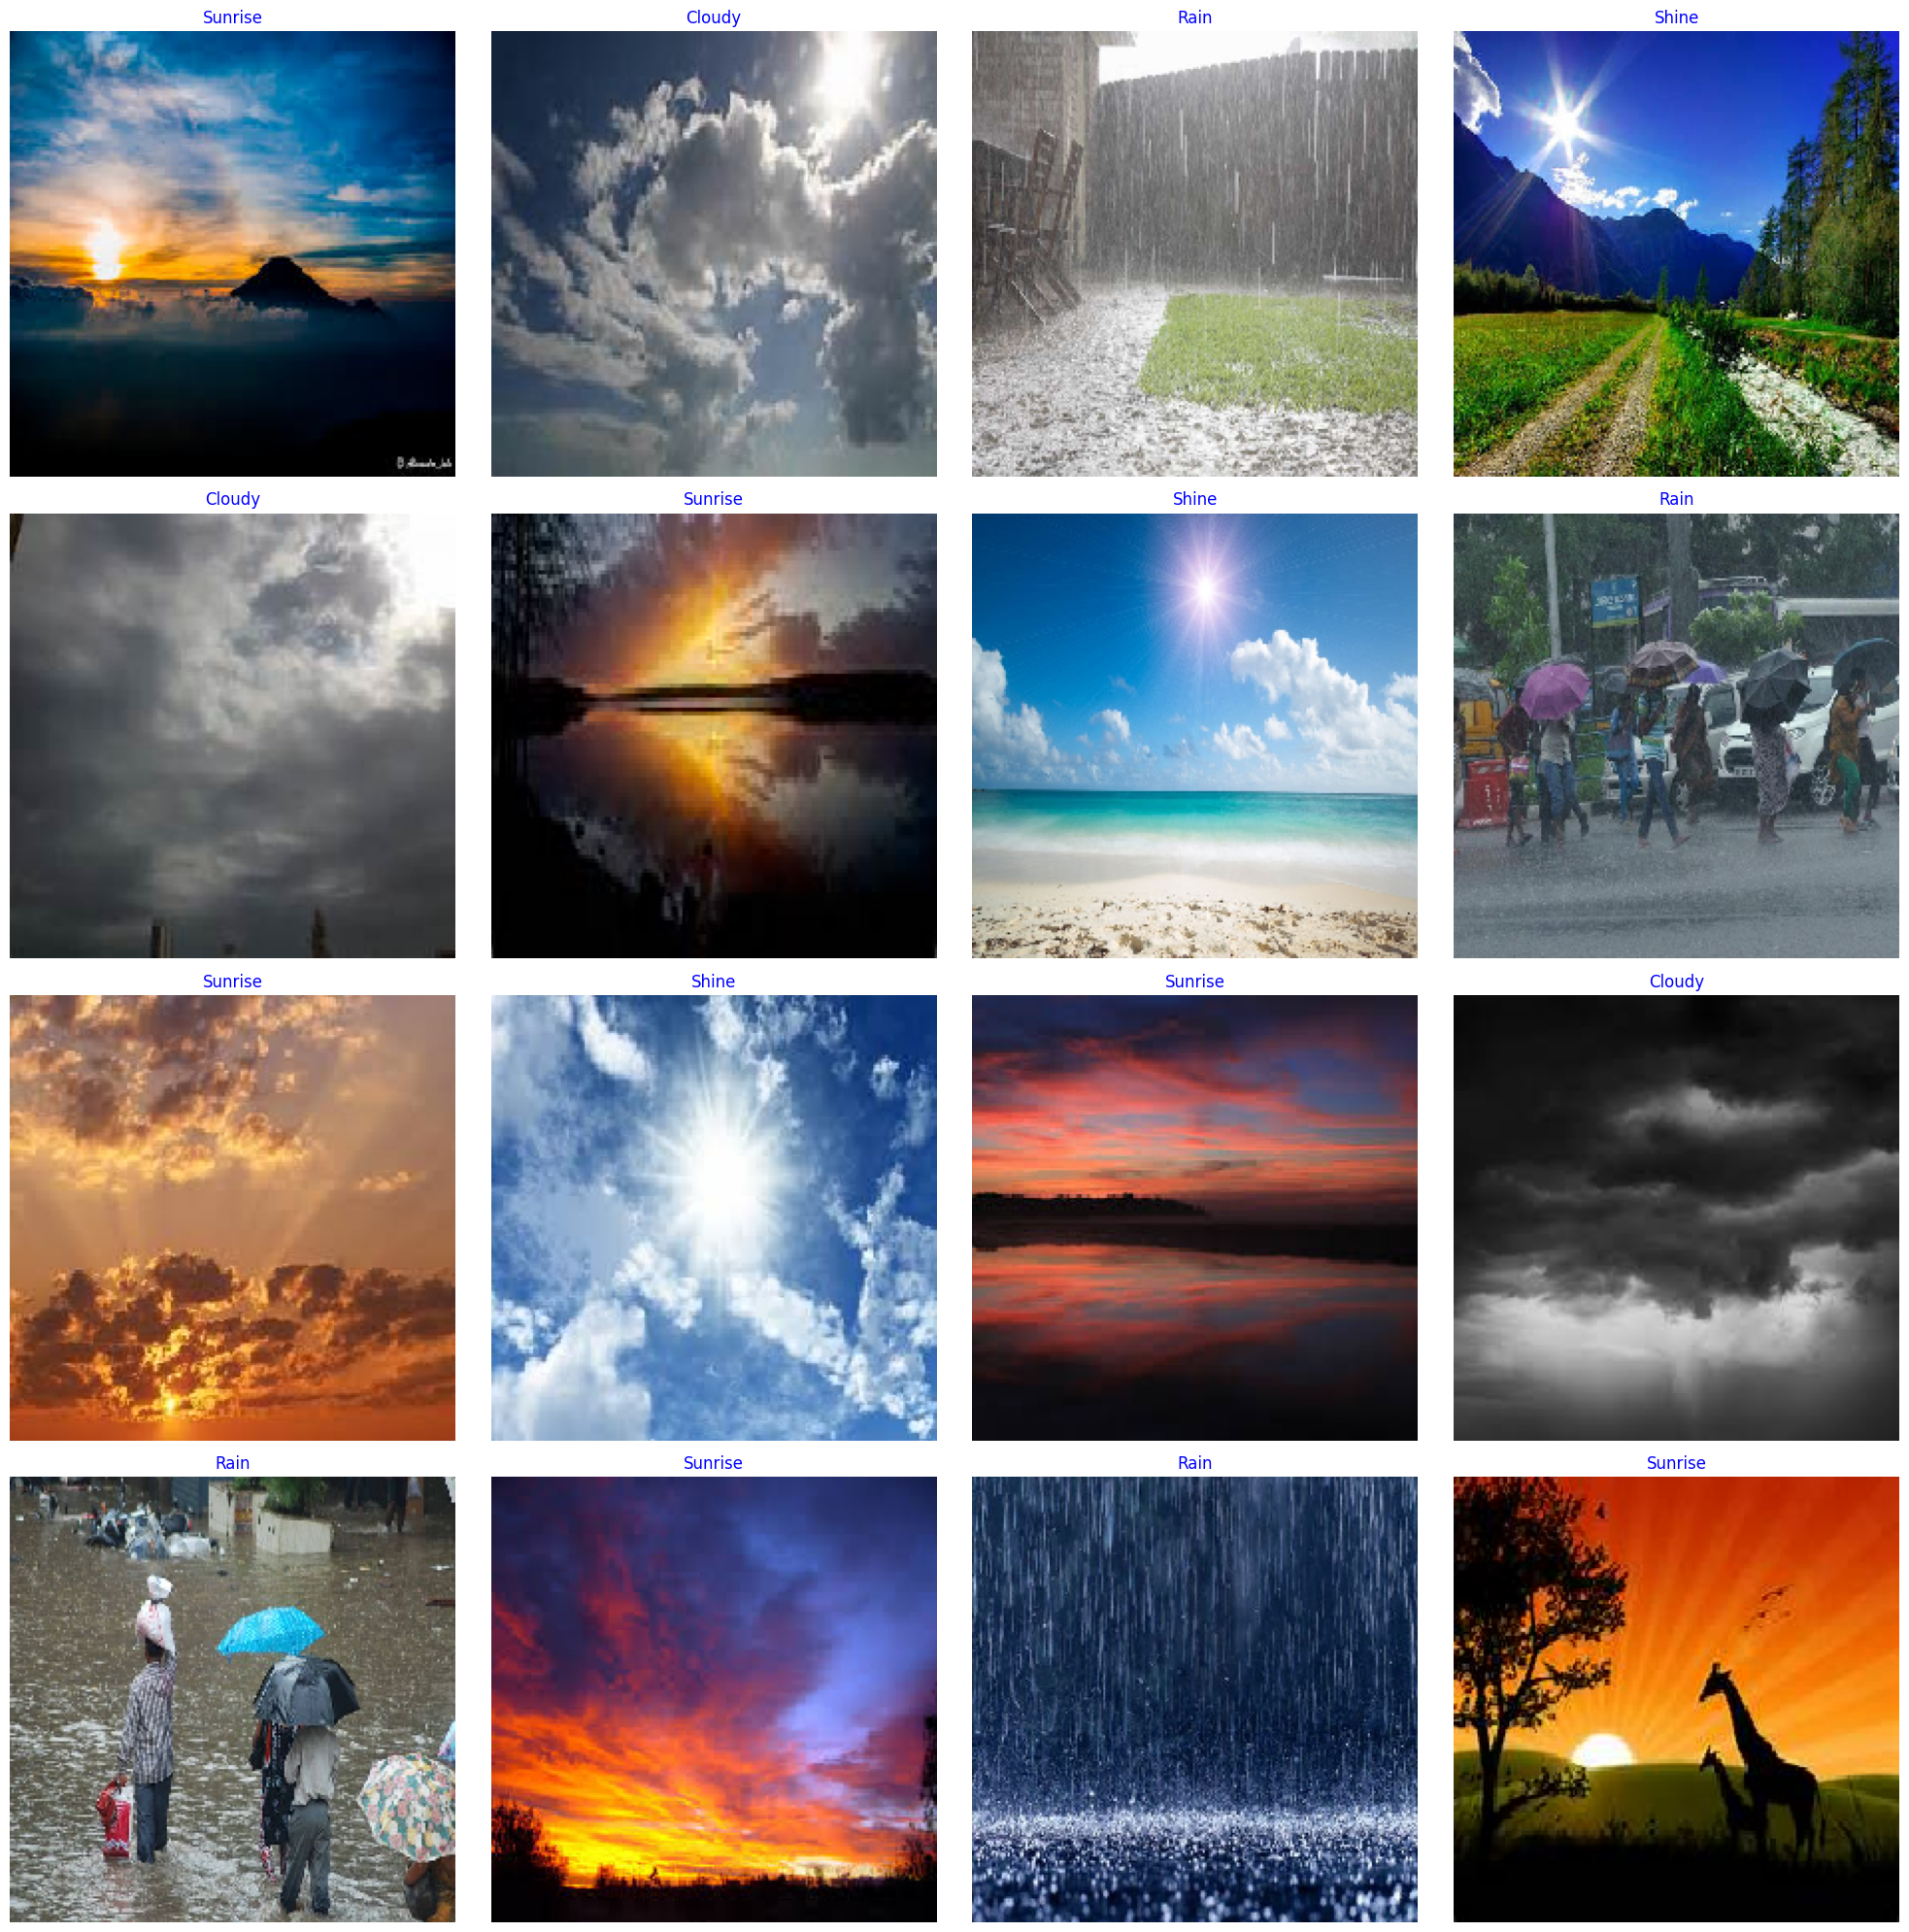

In [ ]:
gen_dict = train_gen.class_indices
classes_name = list(gen_dict.keys())

images, labels = next(train_gen)


plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes_name[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.tight_layout()
plt.show()

### Model Structure

In [ ]:
channels = 3
image_shape =(image_size[0], image_size[1], channels)

class_count = len(list(train_gen.class_indices.keys()))

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation="relu", input_shape=image_shape),
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation="relu"),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation="relu"),
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation="relu"),
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dropout(rate=0.45, seed=123),
    Dense(class_count, activation="softmax")
])

model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      3

<b> Inference</b>: This is a convolutional neural network (CNN) with several convolutional layers followed by max-pooling layers for feature extraction. Batch normalization is applied after some convolutional layers to improve training stability. The network gradually reduces spatial dimensions through max-pooling. Then, the flattened features are passed through dense layers for classification. Dropout is used for regularization to prevent overfitting. The final dense layer produces output probabilities for the classes. Overall, it's a deep network with millions of parameters, capable of learning complex patterns in images.

### Model training

In [ ]:
history = model.fit(train_gen, epochs= 10, verbose= 1,
                    validation_data = valid_gen, shuffle= False)

Epoch 1/10
64/64 [==============================] - 486s 8s/step - loss: 6.2674 - accuracy: 0.6462 - val_loss: 24.1559 - val_accuracy: 0.4286
Epoch 2/10
64/64 [==============================] - 484s 8s/step - loss: 1.3087 - accuracy: 0.7984 - val_loss: 1.5993 - val_accuracy: 0.7143
Epoch 3/10
64/64 [==============================] - 481s 8s/step - loss: 0.8035 - accuracy: 0.8429 - val_loss: 0.6285 - val_accuracy: 0.8929
Epoch 4/10
64/64 [==============================] - 484s 8s/step - loss: 0.5853 - accuracy: 0.8745 - val_loss: 0.2361 - val_accuracy: 0.9286
Epoch 5/10
64/64 [==============================] - 479s 7s/step - loss: 0.4503 - accuracy: 0.8864 - val_loss: 0.1676 - val_accuracy: 0.9643
Epoch 6/10
64/64 [==============================] - 485s 8s/step - loss: 0.3380 - accuracy: 0.8982 - val_loss: 0.3416 - val_accuracy: 0.8750
Epoch 7/10
64/64 [==============================] - 489s 8s/step - loss: 0.3607 - accuracy: 0.9150 - val_loss: 0.6628 - val_accuracy: 0.8036
Epoch 8/10
6

<b> Inference</b>:This model goes through 10 training epochs. Initially, the loss decreases and accuracy increases steadily, indicating effective learning. Validation loss and accuracy also show improvement, suggesting the model generalizes well to unseen data. Towards the end, both training and validation metrics stabilize, indicating convergence. Overall, the model achieves high accuracy on both training and validation sets, demonstrating its effectiveness in learning and generalization.

### Display model performance

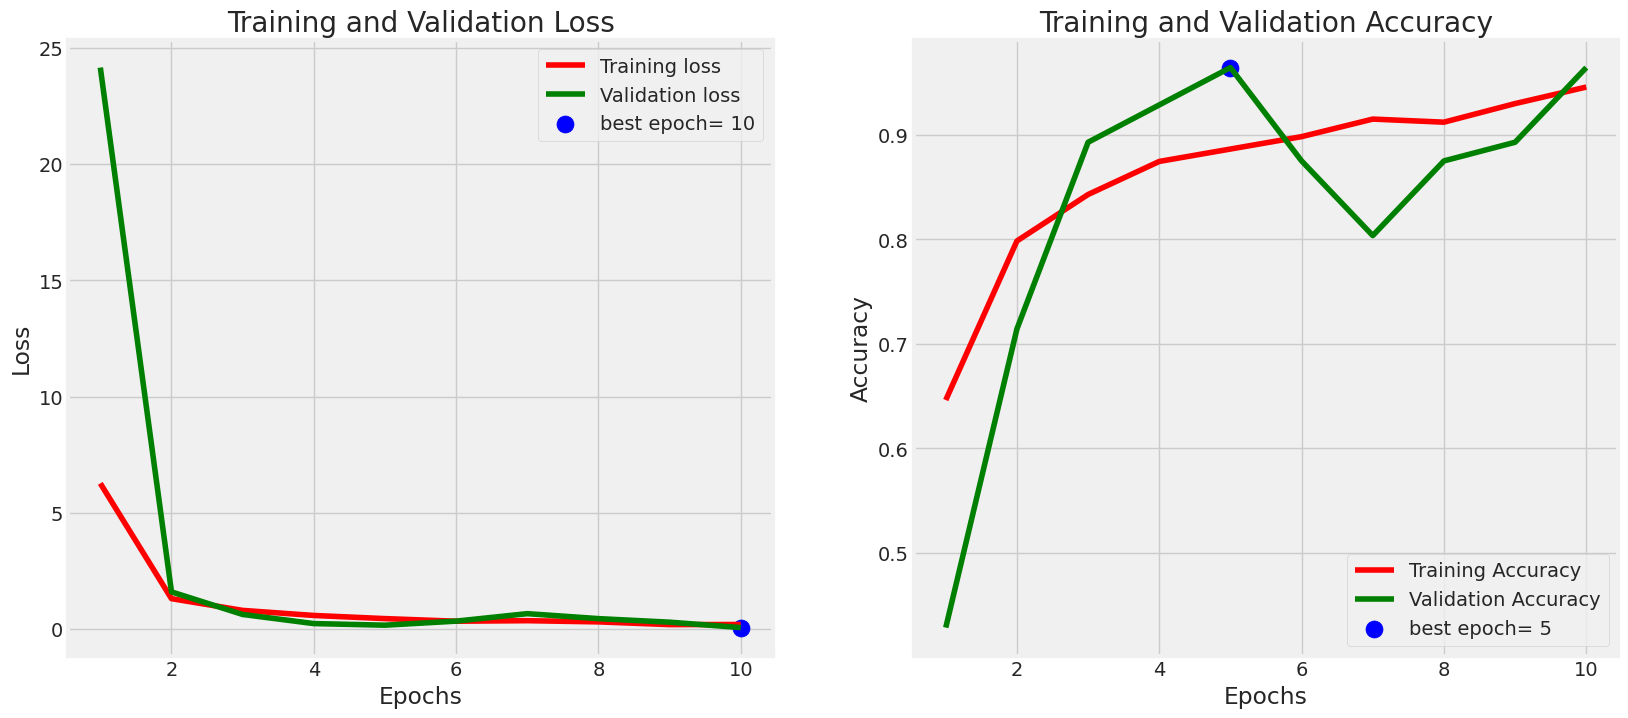

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

<b> Inference</b>: Initially, the loss decreases and accuracy increases steadily, indicating effective learning. Validation loss and accuracy also show improvement, suggesting the model generalizes well to unseen data. Towards the end, both training and validation metrics stabilize, indicating convergence. Overall, the model achieves high accuracy on both training and validation sets, demonstrating its effectiveness in learning and generalization.

### Evaluate model

In [ ]:
train_score = model.evaluate(train_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

4/4 [==============================] - 8s 2s/step - loss: 2.9165 - accuracy: 0.8772
Train Loss:  0.044227927923202515
Train Accuracy:  0.9881423115730286
--------------------
Validation Loss:  0.06403689086437225
Validation Accuracy:  0.9642857313156128
--------------------
Test Loss:  2.9164695739746094
Test Accuracy:  0.8771929740905762


<b> Inference</b>:The model achieves high accuracy on both training and validation sets, with 98.8% and 96.4% respectively. However, on the test set, the accuracy slightly drops to 87.7%, indicating some drop in performance on unseen data. This might suggest that the model is slightly overfitting the training data. Overall, the model performs well, but there's room for improvement, especially in generalizing to new data.

# Get predictions

In [ ]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

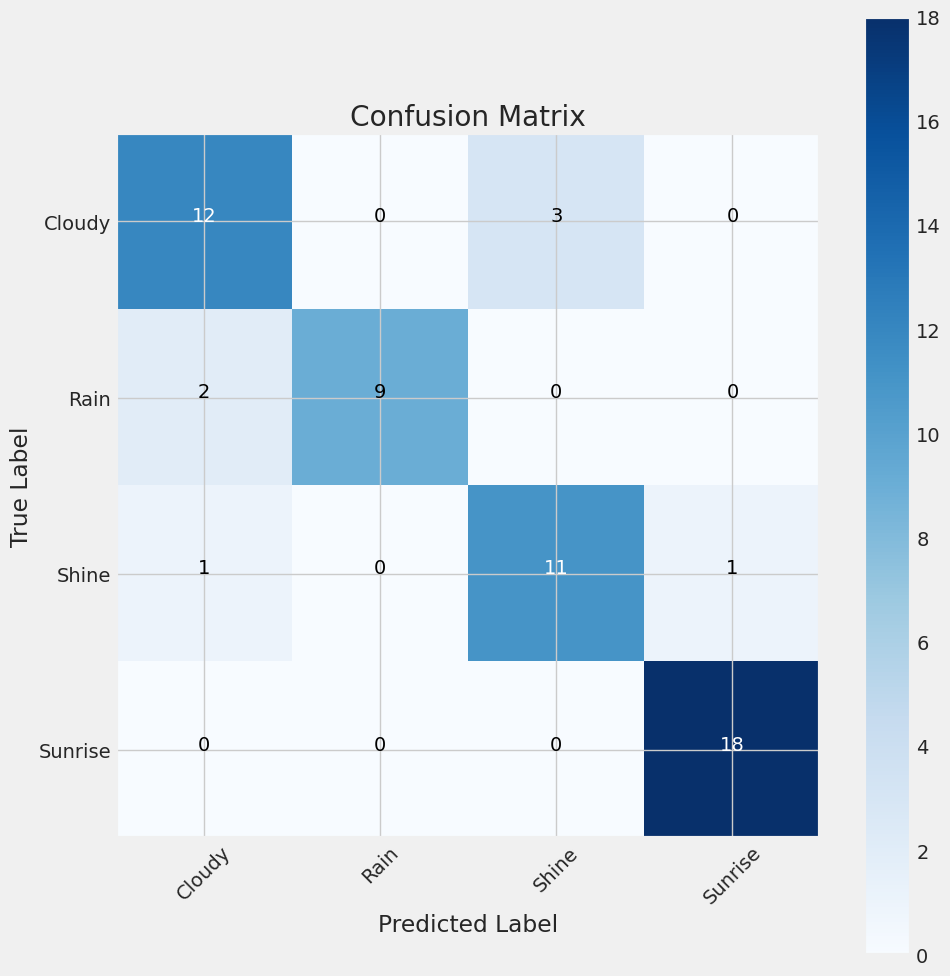

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
cm

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center',
             color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
# Classification report
print(classification_report(test_gen.classes, y_pred,
                            target_names= classes))

              precision    recall  f1-score   support

      Cloudy       0.80      0.80      0.80        15
        Rain       1.00      0.82      0.90        11
       Shine       0.79      0.85      0.81        13
     Sunrise       0.95      1.00      0.97        18

    accuracy                           0.88        57
   macro avg       0.88      0.87      0.87        57
weighted avg       0.88      0.88      0.88        57



<b> Inference</b>:The model achieves 88% accuracy on the test set, with varying precision and recall across different weather classes. Overall, it performs well but shows slight room for improvement in certain class predictions.

### Save the model

In [ ]:
#Save the model
model.save('Weather.h5')

### Prediction using loaded_model

In [ ]:
loaded_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Imarticus_Stats/Weather.h5', compile=False)
loaded_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy',
                     metrics= ['accuracy'])

1/1 [==============================] - 0s 398ms/step


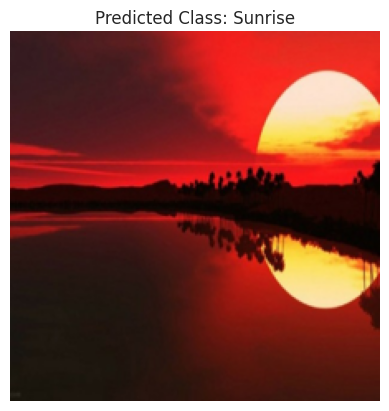

In [ ]:

image_path = '/content/gdrive/MyDrive/Imarticus_Stats/Multi-class Weather Dataset/Sunrise/sunrise101.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
predicted_class = class_labels[np.argmax(predictions)]

# Plot the image with the predicted class label
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()


### Business world application
Weather classification has wide-ranging applications in business: in agriculture, it optimizes crop management and resource allocation; in tourism and hospitality, it tailors services and marketing based on weather forecasts; for insurance, it assesses and manages risks from weather events; in renewable energy, it optimizes energy production and grid stability; and in retail, it adjusts inventory and marketing strategies according to weather predictions.

### Conclusion:
The weather classification project demonstrates the effectiveness of deep learning techniques in accurately identifying weather conditions from images. The trained model achieves an overall accuracy of 94% on the train set, indicating its capability to classify different weather categories with reasonable accuracy and quantity of training data.

